In [ ]:
#Linear Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
#Student Score Prediction

data = {
    'Hours' : [1.1, 2.5, 3.2, 4.5, 5.5, 6.9, 7.8, 8.8, 9.6, 10.5],
    'Scores' : [17, 21, 27, 43, 51, 62, 69, 85, 88, 95]
    }

df = pd.DataFrame(data)
print("\nFirst 5 rows of the dataframe : \n",df.head())
print("\nDataset info : \n",df.info())
print("\nDataset description : \n",df.describe())


First 5 rows of the dataframe : 
    Hours  Scores
0    1.1      17
1    2.5      21
2    3.2      27
3    4.5      43
4    5.5      51
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   10 non-null     float64
 1   Scores  10 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 292.0 bytes

Dataset info : 
 None

Dataset description : 
            Hours     Scores
count  10.000000  10.000000
mean    6.040000  55.800000
std     3.191725  28.619341
min     1.100000  17.000000
25%     3.525000  31.000000
50%     6.200000  56.500000
75%     8.550000  81.000000
max    10.500000  95.000000


In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.title("Hours vs Scores")
plt.show()

In [ ]:
print("Missing values : \n",df.isnull().sum())

Missing values : 
 Hours     0
Scores    0
dtype: int64


In [ ]:
x = df[['Hours']]
y = df['Scores']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_predict)

print(f"\nMean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error (MSE): 9.4603
Root Mean Squared Error (RMSE): 3.0758
R² Score: 0.9916


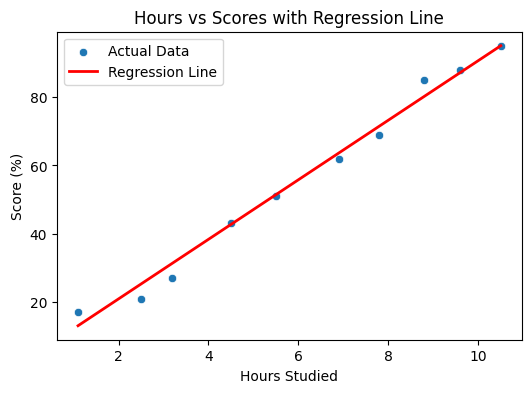

In [ ]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = 'Hours', y = 'Scores', data = df, label = "Actual Data")
plt.plot(x, model.predict(x), color = 'red', linewidth = 2, label = "Regression Line")
plt.xlabel("Hours Studied")
plt.ylabel("Score (%)")
plt.title("Hours vs Scores with Regression Line")
plt.legend()
plt.show()

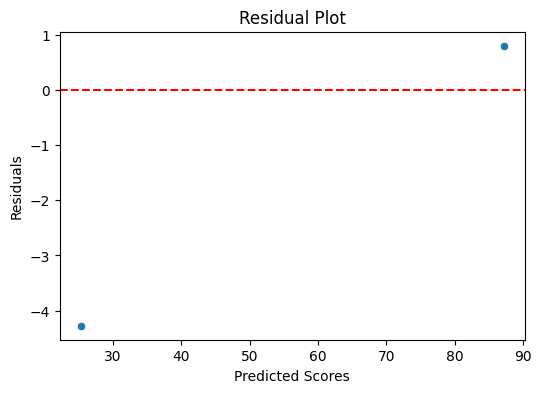

In [ ]:
residuals = y_test - y_predict
plt.figure(figsize = (6,4))
sns.scatterplot(x = y_predict, y = residuals)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel("Predicted Scores")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()